In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [2]:
file_path = r"E:\dataset ml\data.csv"
df = pd.read_csv(file_path)

print(df.shape)
print(df.head())


(614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2         

In [3]:
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
df.fillna(0, inplace=True)


In [5]:
df.dropna(inplace=True)


In [6]:
print(df.dtypes)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
print(df_encoded.columns.tolist())



['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008', 'Loan_ID_LP001011', 'Loan_ID_LP001013', 'Loan_ID_LP001014', 'Loan_ID_LP001018', 'Loan_ID_LP001020', 'Loan_ID_LP001024', 'Loan_ID_LP001027', 'Loan_ID_LP001028', 'Loan_ID_LP001029', 'Loan_ID_LP001030', 'Loan_ID_LP001032', 'Loan_ID_LP001034', 'Loan_ID_LP001036', 'Loan_ID_LP001038', 'Loan_ID_LP001041', 'Loan_ID_LP001043', 'Loan_ID_LP001046', 'Loan_ID_LP001047', 'Loan_ID_LP001050', 'Loan_ID_LP001052', 'Loan_ID_LP001066', 'Loan_ID_LP001068', 'Loan_ID_LP001073', 'Loan_ID_LP001086', 'Loan_ID_LP001087', 'Loan_ID_LP001091', 'Loan_ID_LP001095', 'Loan_ID_LP001097', 'Loan_ID_LP001098', 'Loan_ID_LP001100', 'Loan_ID_LP001106', 'Loan_ID_LP001109', 'Loan_ID_LP001112', 'Loan_ID_LP001114', 'Loan_ID_LP001116', 'Loan_ID_LP001119', 'Loan_ID_LP001120', 'Loan_ID_LP001123', 'Loan_ID_LP001131', 'Loan_ID_LP001136', 'Loan_ID_LP001137', 'Loan_I

In [13]:
X = df_encoded.drop("ApplicantIncome", axis=1)
y = df_encoded["LoanAmount"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.13821138211382114

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         9.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         2
        42.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         0
        50.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         0
        56.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        70.0       0.00      0.00      0.00         2
        71.0       0.00      0.00      0.00         2
        72.0       0.00      0.00      0.00         1
        73.0       0.00   

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name

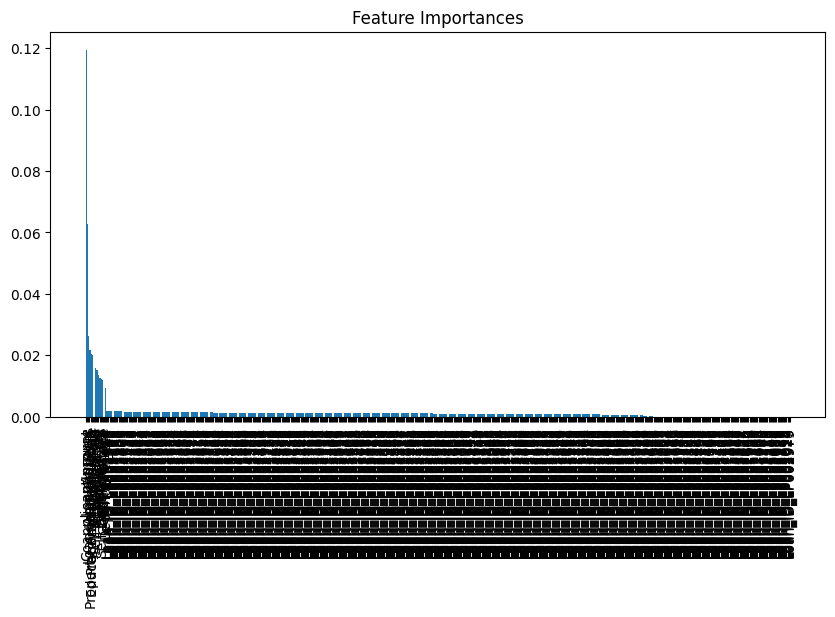

In [17]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [18]:
joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']

In [19]:
loaded_model = joblib.load("rf_model.pkl")


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [22]:
# This ensures the backslashes are not misread
file_path = r"E:\dataset ml\data.csv"

# Read your CSV
df = pd.read_csv(file_path)

# Show the first few rows
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [23]:
print(df.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [25]:
X = df.drop("ApplicantIncome", axis=1)
y = df["LoanAmount"]


In [26]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [28]:
print(X_scaled.shape)



(614, 627)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}



In [31]:
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
    except Exception as e:
        print(f"Error with {name}: {e}")


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Error with KNN: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess 

In [32]:
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [33]:
df_clean = df.dropna()


In [34]:
# Fill numeric columns
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [35]:
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [37]:
X = df.drop("ApplicantIncome", axis=1)
y = df["LoanAmount"]

# Proceed with encoding, scaling, splitting, training...


In [38]:
# STEP X — Fill numeric columns
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col] = df[col].fillna(df[col].mean())

# STEP X — Fill categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 1 — Load your CSV
file_path = r"E:\dataset ml\data.csv"
df = pd.read_csv(file_path)

# STEP 2 — Check columns
print("Columns in your data:")
print(df.columns.tolist())

# STEP 3 — Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# STEP 4 — Fill missing values

# Fill numeric columns with mean
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
print("\nMissing values after filling:")
print(df.isnull().sum())

# STEP 5 — Define targets
targets = ["ApplicantIncome", "LoanAmount"]

# STEP 6 — Loop through each target
for target_column in targets:
    print(f"\n----- Training models for target: {target_column} -----")

    # Prepare X and y
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Define regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor()
    }

    # Train and evaluate each model
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print(f"{name}: MSE={mse:.2f}, R2={r2:.4f}")
        except Exception as e:
            print(f"Error with {name}: {e}")


Columns in your data:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

----- Training models for target: ApplicantIncome -----
Linear Regression: M

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv(r"E:\dataset ml\data.csv")  # Use raw string for Windows path

# Drop Loan_ID (not useful for prediction)
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"{name}:\n Accuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}, F1={f1:.2f}\n")
    except Exception as e:
        print(f"Error with {name}: {e}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\3887951978.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Decision Tree:
 Accuracy=0.74, Precision=0.79, Recall=0.81, F1=0.80

Random Forest:
 Accuracy=0.78, Precision=0.77, Recall=0.95, F1=0.85



C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\2784978319.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Decision Tree Accuracy: 0.73
Random Forest Accuracy: 0.77


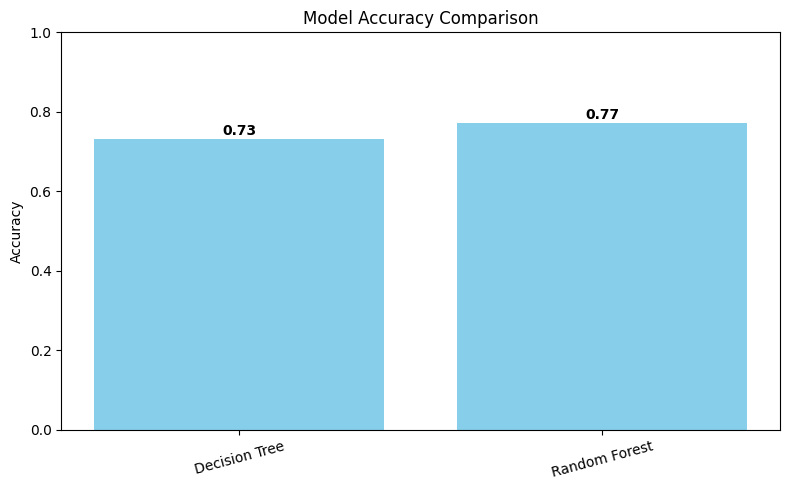

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv(r"E:\dataset ml\data.csv")
df.drop('Loan_ID', axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_scores[name] = acc
        print(f"{name} Accuracy: {acc:.2f}")
    except Exception as e:
        print(f"Error with {name}: {e}")

# Plot accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


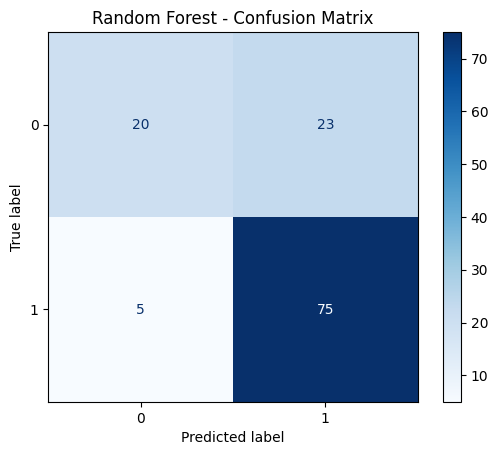

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Inside your model loop:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.show()


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


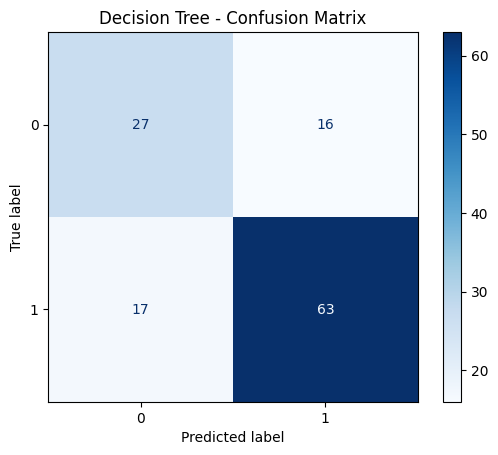

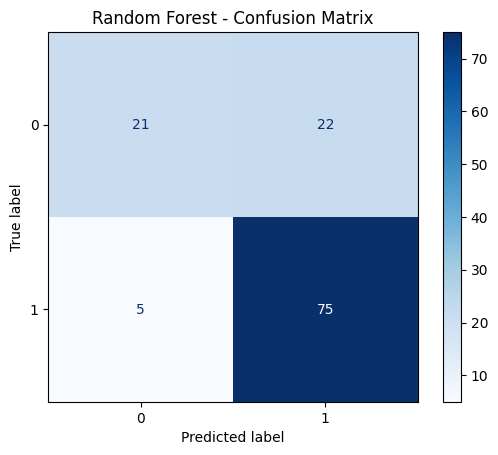

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store all scores
metrics_scores = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics_scores["Model"].append(name)
        metrics_scores["Accuracy"].append(acc)
        metrics_scores["Precision"].append(prec)
        metrics_scores["Recall"].append(rec)
        metrics_scores["F1"].append(f1)

        # Optional: Show confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

    except Exception as e:
        print(f"Error with {name}: {e}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\2597682834.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


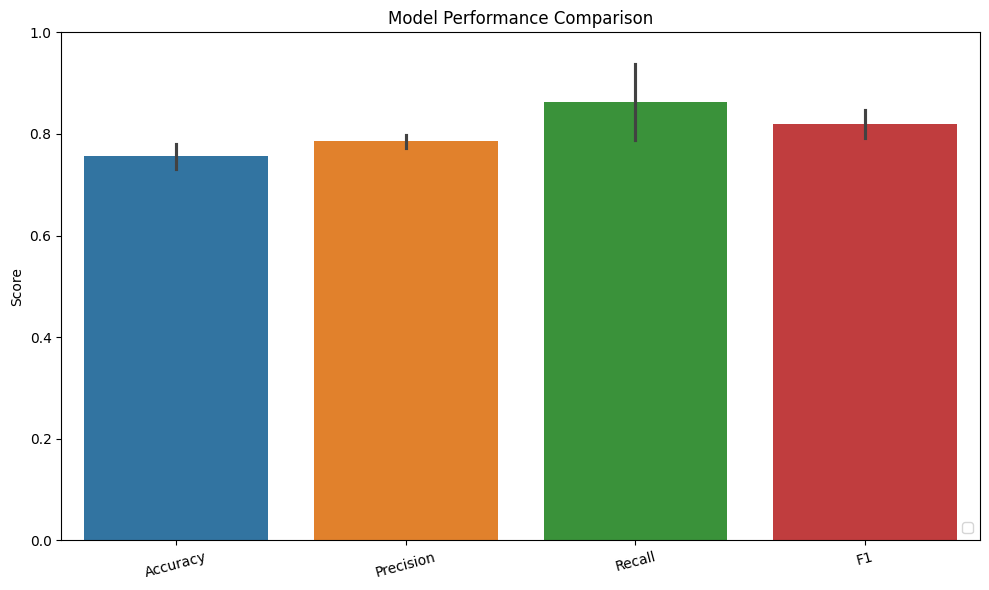

In [5]:
import seaborn as sns

df_metrics = pd.DataFrame(metrics_scores)
df_metrics.set_index('Model', inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\372470226.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


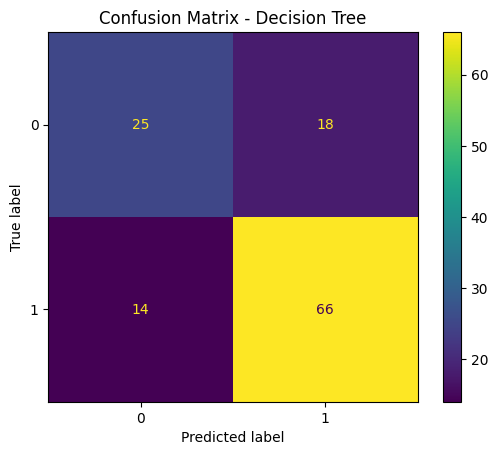

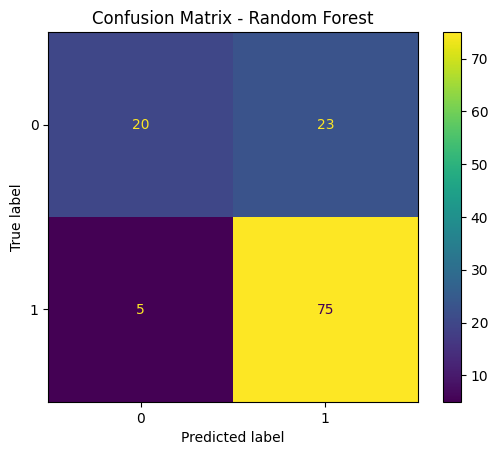

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\372470226.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')


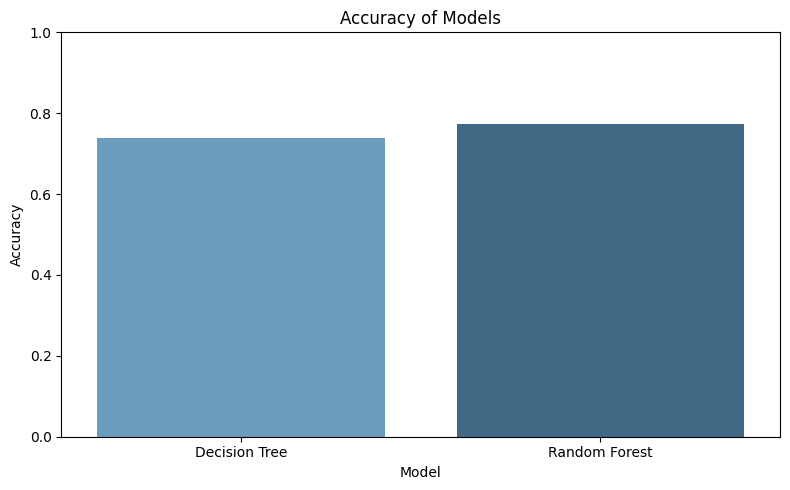

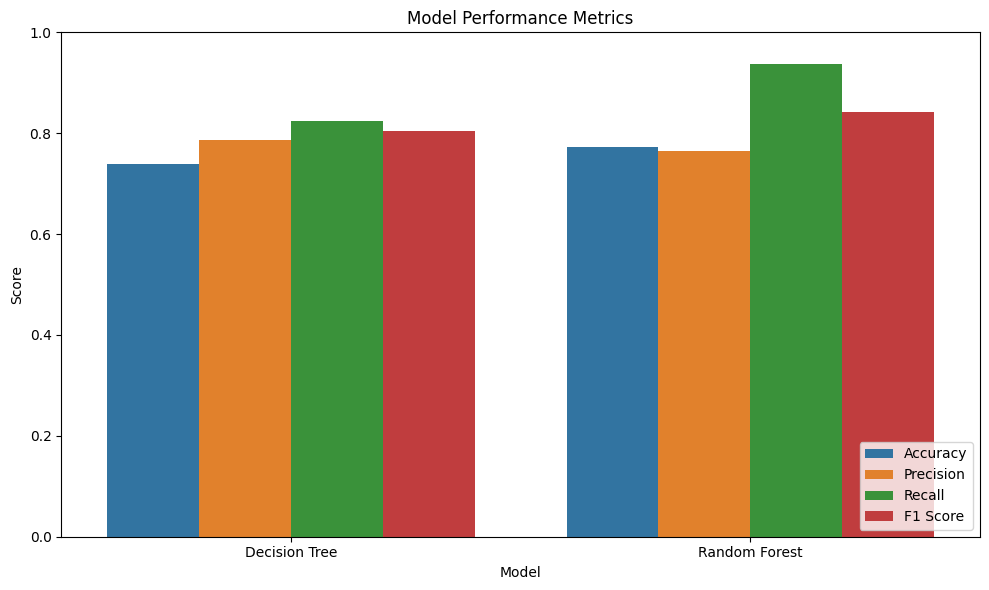

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Load dataset
df = pd.read_csv(r"E:\dataset ml\data.csv")
df.drop('Loan_ID', axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and collect metrics
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics['Model'].append(name)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['F1 Score'].append(f1_score(y_test, y_pred))

        # Show confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

    except Exception as e:
        print(f"Error with {name}: {e}")

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')
plt.title("Accuracy of Models")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot all metrics
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted)
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\430801813.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Error with Logistic Regression: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


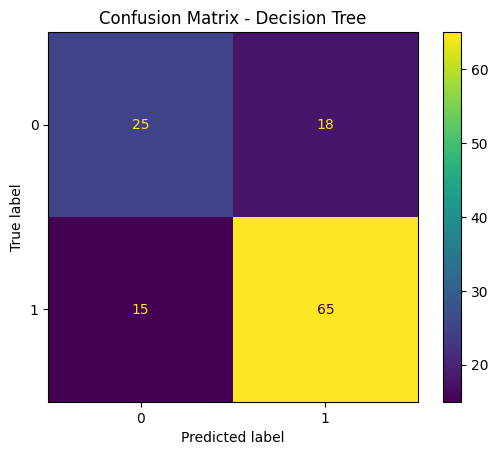

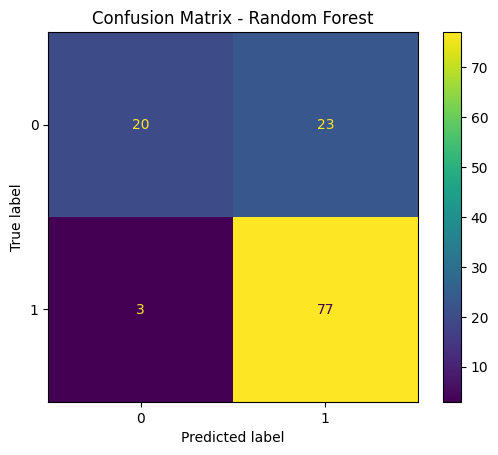


✅ Best Model: Random Forest (F1 Score = 0.86)
💾 Model saved as 'best_loan_model.pkl'


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\430801813.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')


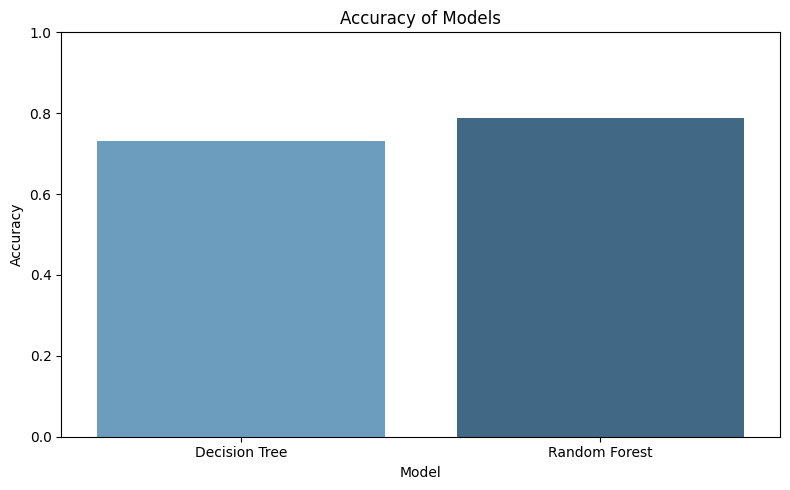

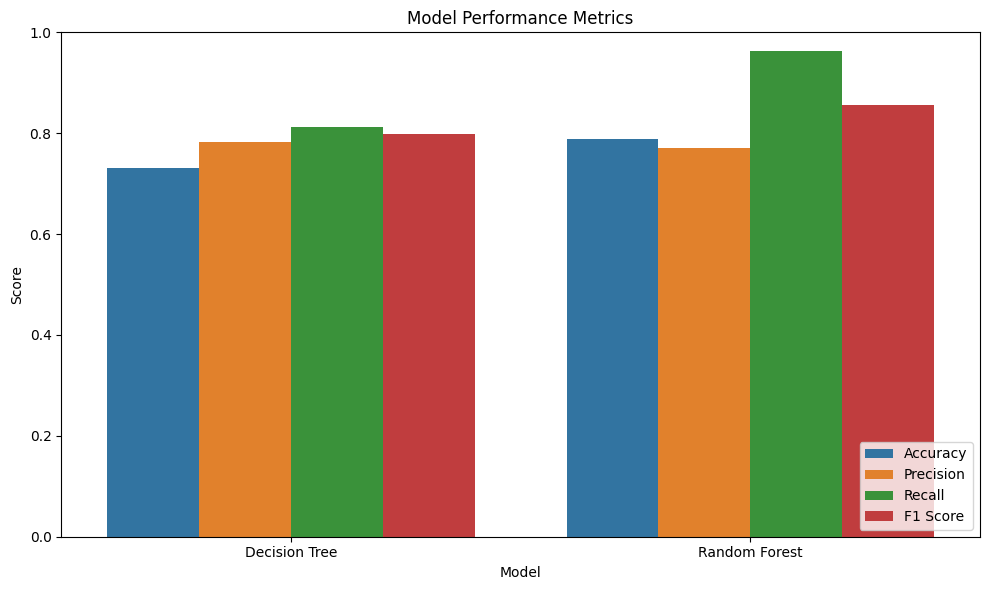

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Load and preprocess data
df = pd.read_csv(r"E:\dataset ml\data.csv")
df.drop('Loan_ID', axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Track metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Instance': []
}

best_f1 = 0
best_model_name = ""
best_model_instance = None

# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store metrics
        metrics['Model'].append(name)
        metrics['Accuracy'].append(acc)
        metrics['Precision'].append(prec)
        metrics['Recall'].append(rec)
        metrics['F1 Score'].append(f1)
        metrics['Instance'].append(model)

        # Select best model based on F1
        if f1 > best_f1:
            best_f1 = f1
            best_model_name = name
            best_model_instance = model

        # Show confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

    except Exception as e:
        print(f"Error with {name}: {e}")

# Save best model
if best_model_instance:
    joblib.dump(best_model_instance, "best_loan_model.pkl")
    print(f"\n✅ Best Model: {best_model_name} (F1 Score = {best_f1:.2f})")
    print("💾 Model saved as 'best_loan_model.pkl'")

# Convert to DataFrame and plot
metrics_df = pd.DataFrame(metrics).drop(columns='Instance')

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')
plt.title("Accuracy of Models")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted)
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\2993678244.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


🔍 Evaluating Logistic Regression with cross-validation...


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line

🔍 Evaluating Decision Tree with cross-validation...
🔍 Evaluating Random Forest with cross-validation...


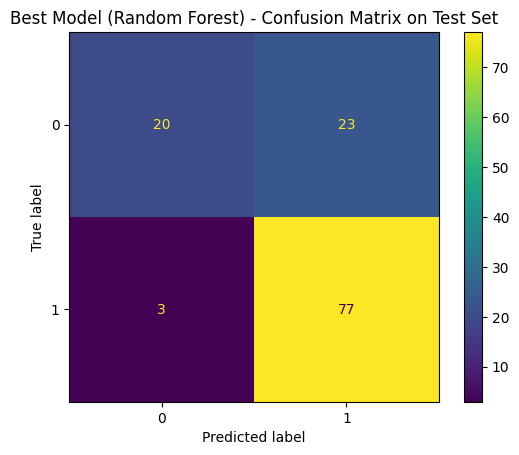


✅ Best Model: Random Forest (F1 Score = 0.86)
💾 Model saved as 'best_loan_model.pkl'


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19620\2993678244.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')


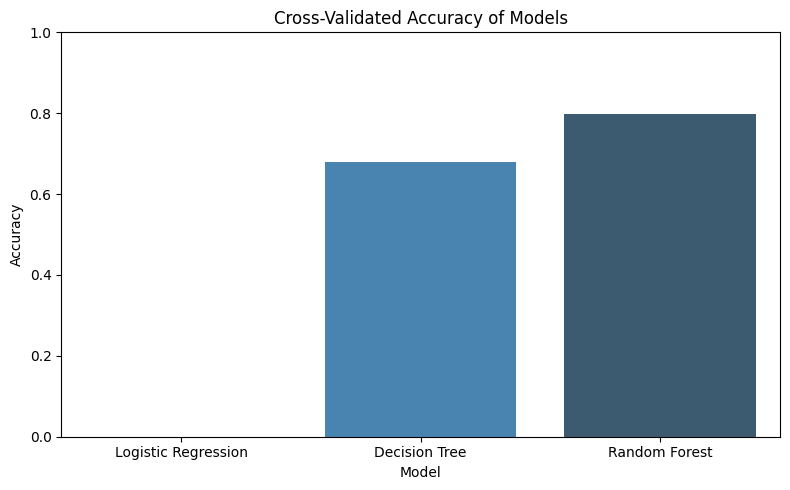

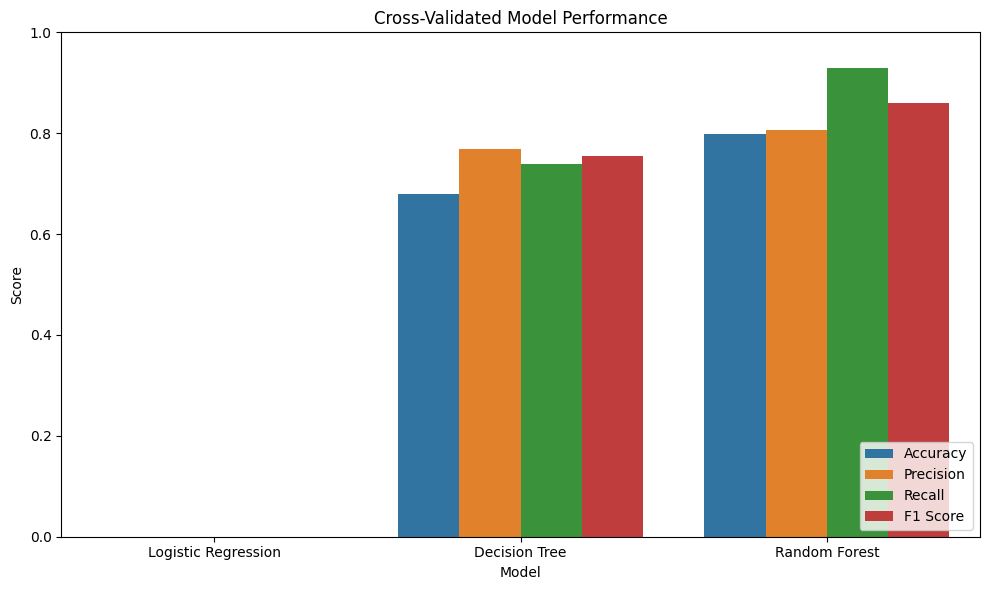

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Load and preprocess data
df = pd.read_csv(r"E:\dataset ml\data.csv")
df.drop('Loan_ID', axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Store scores
cv_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Instance': []
}

best_f1 = 0
best_model_name = ""
best_model_instance = None

# Evaluate with cross-validation
for name, model in models.items():
    try:
        print(f"🔍 Evaluating {name} with cross-validation...")
        model_scores = {}

        for metric_name, scorer in scorers.items():
            scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cv)
            model_scores[metric_name] = np.mean(scores)

        # Store results
        cv_results['Model'].append(name)
        cv_results['Accuracy'].append(model_scores['Accuracy'])
        cv_results['Precision'].append(model_scores['Precision'])
        cv_results['Recall'].append(model_scores['Recall'])
        cv_results['F1 Score'].append(model_scores['F1'])
        cv_results['Instance'].append(model)

        # Track best by F1
        if model_scores['F1'] > best_f1:
            best_f1 = model_scores['F1']
            best_model_name = name
            best_model_instance = model

    except Exception as e:
        print(f"❌ Error with {name}: {e}")

# Train best model on full training set and test
best_model_instance.fit(X_train, y_train)
y_pred = best_model_instance.predict(X_test)

# Confusion matrix on test set
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Best Model ({best_model_name}) - Confusion Matrix on Test Set')
plt.show()

# Save best model
joblib.dump(best_model_instance, 'best_loan_model.pkl')
print(f"\n✅ Best Model: {best_model_name} (F1 Score = {best_f1:.2f})")
print("💾 Model saved as 'best_loan_model.pkl'")

# Plot metrics
metrics_df = pd.DataFrame(cv_results).drop(columns='Instance')

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='Blues_d')
plt.title("Cross-Validated Accuracy of Models")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted)
plt.title("Cross-Validated Model Performance")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


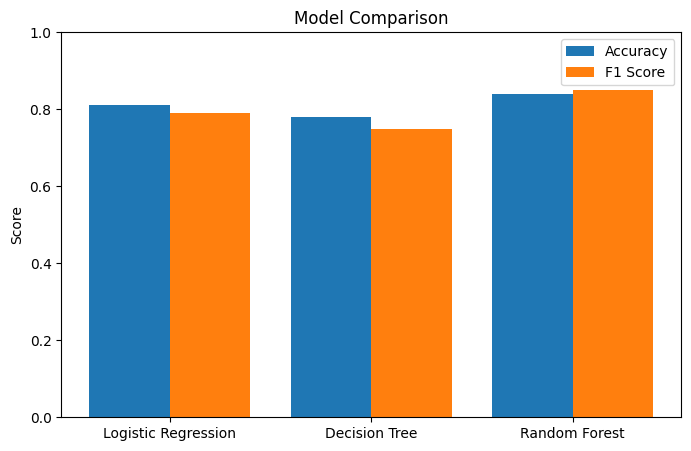

In [10]:
import matplotlib.pyplot as plt

# Example metric values (replace with your actual cross-val results)
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.81, 0.78, 0.84]
f1_scores = [0.79, 0.75, 0.85]

# Plot
plt.figure(figsize=(8, 5))
x = range(len(models))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [11]:
import joblib

# Replace with your trained best model
best_model = RandomForestClassifier().fit(X_train, y_train)
joblib.dump(best_model, "best_model.pkl")
print("✅ Model saved to best_model.pkl")


✅ Model saved to best_model.pkl


In [13]:
import joblib

# Replace with your trained best model
best_model = RandomForestClassifier().fit(X_train, y_train)
joblib.dump(best_model, "best_model.pkl")
print("✅ Model saved to best_model.pkl")


✅ Model saved to best_model.pkl


In [14]:
# Example new input (must have same columns/features as X_train)
new_data = pd.DataFrame([{
    'Gender': 1, 'Married': 1, 'Dependents': 0, 'Education': 0,
    'Self_Employed': 0, 'ApplicantIncome': 4000, 'CoapplicantIncome': 1500,
    'LoanAmount': 130, 'Loan_Amount_Term': 360, 'Credit_History': 1,
    'Property_Area': 2
}])

# Load model & predict
model = joblib.load("best_model.pkl")
prediction = model.predict(new_data)
print("Prediction:", "Approved" if prediction[0] == 1 else "Rejected")


Prediction: Approved


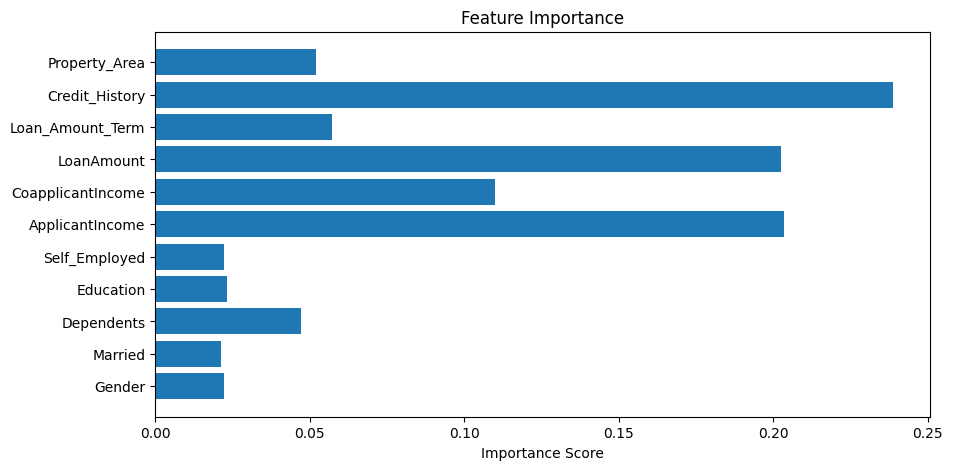

In [15]:
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()
